In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
from BinanceCollector import BinanceCollector
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

c:\Users\deves\AppData\Local\Programs\Python\Python37\lib\site-packages\requests\__init__.py:114: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  RequestsDependencyWarning,


In [2]:
collector = BinanceCollector("ETHUSDT","2021-06-01","2022-12-31","4h")
collector.start_collect()
collector.df.columns = ["Open Time","Open","High","Low","Close","Volume","Close Time",
             "Quote asset volumne","Total Trades","Buyer Base Volume",
             "Taker buy quote asset volume","Ignore"]
df = collector.df
df["Next"] = df["Close"].shift(-3)
df.dropna(inplace=True)
std = df.std()
mean = df.mean()
df=(df-df.mean())/df.std()

In [3]:
df.tail()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote asset volumne,Total Trades,Buyer Base Volume,Taker buy quote asset volume,Ignore,Next
2882,1.726352,-1.254581,-1.264445,-1.236477,-1.251800,-0.659979,1.726352,-1.070197,-0.911499,-0.661145,-1.075582,NaN,-1.261970
2883,1.727352,-1.252290,-1.268001,-1.239130,-1.254471,-0.845899,1.727352,-1.187064,-1.070800,-0.888633,-1.219064,NaN,-1.259584
2884,1.728352,-1.254973,-1.266761,-1.242645,-1.252465,-0.750698,1.728352,-1.127992,-0.874847,-0.758154,-1.137578,NaN,-1.255311
2885,1.730351,-1.255805,-1.272758,-1.249467,-1.264434,-0.524036,1.730351,-0.988916,-0.923052,-0.643504,-1.067755,NaN,-1.255487
2886,1.731351,-1.264942,-1.275810,-1.245932,-1.262046,-0.842506,1.731351,-1.186441,-1.029990,-0.826577,-1.181716,NaN,-1.250500


In [4]:
x = np.array(df[["Open","High","Low","Close","Volume"]])
y = np.array( df["Next"] )

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
x_train = np.reshape(x_train,(x_train.shape[0],1,x_train.shape[1]))
x_test = np.reshape(x_test,(x_test.shape[0],1,x_test.shape[1]))

In [6]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(1,5),activation="relu" ),
    keras.layers.LSTM(8),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(optimizer="adam",
                loss="mape",
                metrics=["mse"],
                )

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [7]:
model.fit(x_train,y_train,epochs=20)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 2165 samples
Epoch 1/20
2165/2165 [==============================] - 1s 327us/sample - loss: 89.5818 - mean_squared_error: 0.8316
Epoch 2/20
2165/2165 [==============================] - 0s 92us/sample - loss: 59.6908 - mean_squared_error: 0.3864
Epoch 3/20
2165/2165 [==============================] - 0s 91us/sample - loss: 35.2274 - mean_squared_error: 0.0657
Epoch 4/20
2165/2165 [==============================] - 0s 108us/sample - loss: 24.8055 - mean_squared_error: 0.0213
Epoch 5/20
2165/2165 [==============================] - 0s 96us/sample - loss: 21.6514 - mean_squared_error: 0.0115
Epoch 6/20
2165/2165 [==============================] - 0s 96us/sample - loss: 19.1418 - mean_squared_error: 0.0101
Epoch 7/20
2165/2165 [==============================] - 0s 98us/sample - loss: 19.3529 - mean_squared_error: 0.0102
Epoch 8/20
2165/2165 [==============================] - 0s 110us/sampl

In [8]:
model.evaluate(x_test,y_test)

722/722 [==============================] - 0s 161us/sample - loss: 39.0652 - mean_squared_error: 0.0091


[39.065171014569145, 0.009077015]

In [9]:
x_pred = np.reshape( x,(x.shape[0],1,x.shape[1]) )

In [10]:
y_pred = np.reshape(model.predict(x_pred),(y.shape[0]))
df = df*std + mean

In [11]:
df["Preds"] = y_pred*std["Next"] + mean["Next"]

<AxesSubplot:>

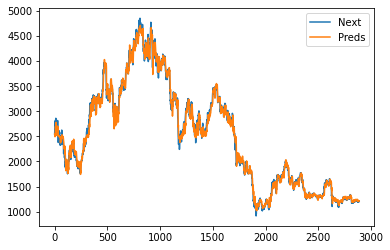

In [12]:
df[["Next","Preds"]].plot()

In [13]:
# df = (df*std) + mean
df["Change"] = (df["Next"]-df["Close"])*100/df["Close"]
df["Change Pred"] = (df["Preds"]-df["Close"])*100/df["Close"]
df["Open Time"] = pd.to_datetime(df["Open Time"],unit="ms")
df["Close Time"] = pd.to_datetime(df["Close Time"],unit="ms")
df

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote asset volumne,Total Trades,Buyer Base Volume,Taker buy quote asset volume,Ignore,Next,Preds,Change,Change Pred
0,2021-06-01 04:00:00,2630.66,2716.33,2615.27,2652.53,166661.30183,2021-06-01 07:59:59.999,4.439993e+08,274523.0,83785.23778,2.233812e+08,NaN,2542.67,2538.927490,-4.141706,-4.282798
1,2021-06-01 08:00:00,2652.37,2672.60,2547.12,2624.09,263021.10974,2021-06-01 11:59:59.999,6.819996e+08,382417.0,126095.68965,3.270095e+08,NaN,2634.57,2531.201172,0.399377,-3.539849
2,2021-06-01 12:00:00,2624.23,2666.00,2523.74,2568.49,294840.31972,2021-06-01 15:59:59.999,7.647329e+08,413221.0,144396.33380,3.747577e+08,NaN,2692.60,2512.418701,4.832022,-2.183045
3,2021-06-01 16:00:00,2568.62,2588.00,2528.00,2542.67,139025.64246,2021-06-01 19:59:59.999,3.553296e+08,196744.0,67790.45595,1.732545e+08,NaN,2694.35,2490.427979,5.965383,-2.054613
4,2021-06-01 20:00:00,2542.68,2650.00,2535.72,2634.57,125258.49081,2021-06-01 23:59:59.999,3.249779e+08,202835.0,61767.86074,1.603064e+08,NaN,2791.24,2512.272949,5.946701,-4.642012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2882,2022-12-29 12:00:00,1198.84,1206.57,1197.71,1201.17,52580.05130,2022-12-29 15:59:59.999,6.319891e+07,71715.0,26182.69200,3.147118e+07,NaN,1188.26,1217.228760,-1.074785,1.336926
2883,2022-12-29 16:00:00,1201.18,1202.90,1195.03,1198.44,35568.37160,2022-12-29 19:59:59.999,4.264520e+07,54286.0,15794.02740,1.893418e+07,NaN,1190.70,1219.720825,-0.645840,1.775711
2884,2022-12-29 20:00:00,1198.44,1204.18,1191.48,1200.49,44279.24140,2022-12-29 23:59:59.999,5.303434e+07,75725.0,21752.58050,2.605413e+07,NaN,1195.07,1216.570068,-0.451482,1.339459
2885,2022-12-30 04:00:00,1197.59,1197.99,1184.59,1188.26,65018.74480,2022-12-30 07:59:59.999,7.749394e+07,70451.0,26988.30960,3.215505e+07,NaN,1194.89,1206.719727,0.557959,1.553509


In [14]:
# df[["Open","High","Low","Close","Volume"]]
x = np.array([[1,2,3,4,5]])
x = np.reshape(x,(1,1,5))

In [15]:
model.predict(x)

array([[2.2685993]], dtype=float32)